In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

In [2]:
data_path = './dataFolders/Final Tracking xypts/AngleAndRadiusIncluded/'

In [31]:
def angleCorloredTrajectory(x_gauss, y_gauss, circ_r, angle):
    
    ax = plt.gca()
    ax.set_facecolor('black')

    c1 = plt.Circle((0, 0), circ_r, facecolor='linen', alpha = 0.7, 
                    edgecolor='none', zorder = -3)
    ax.add_artist(c1)

    plt.scatter(x_gauss, y_gauss, s=7 , c = angle, cmap = plt.cm.jet, 
               zorder = 1)
    ax.set_aspect('equal', adjustable = 'datalim')
    ax.tick_params(axis = 'both',
                which = 'both',
                bottom = False,
                left = False,
                labelbottom = False,
                  labelleft = False)

    cbar = plt.colorbar()
    
    return(fig)

def angleColoredSweepCurves(r_gauss, circ_r, angle):
    fig = plt.subplots(figsize = (5,5))
    t0 = np.arange(len(r_gauss))*1/100
    plt.scatter(t0, r_gauss/circ_r, s = 10,
                c = angle, cmap = plt.cm.jet)
    cbar = plt.colorbar()
    return(fig)

In [4]:
datalist = glob.glob(data_path + '**.csv')
circ_parameters = pd.read_csv('./dataFolders/circle_parameters.csv')

In [5]:
shapes = ['c-1_', 'c-2_', 'c-3_', 'c-10_']

In [6]:
handpicked = ['c-1_m13',
              'c-2_m11',
              'c-3_m10',
              'c-10_m11']

In [7]:
fig_path = './dataFolders/Figures/figuresForDepartmentTalk/'

In [ ]:
trial = ['first', 'last']

plt.style.use('seaborn')

fig, ax = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)

cc = 0
for name in handpicked:
    path = [data for data in datalist if name in data]
    
    ii = 0
    for tt in trial:
        p = [x for x in path if tt in x][0]
        
        file = pd.read_csv(p)
        r = file.loc[:,'r_gauss'].values
#       print(ii, cc)
        t = np.arange(0,len(r))
        ax[ii, cc].plot(t*1/100, r, color = 'dimgrey')
        ax[ii, cc].tick_params(axis='both', which='major', labelsize=10)
        ii+=1
    cc+=1


fig.savefig(fig_path + 'radialSweepsAllFlowers.png')

In [ ]:
trial = ['first', 'last']

fig, ax = plt.subplots(1,2, figsize = (20,10), sharex = True, sharey = True)

cc = 0
for name in handpicked[2:3]:
    path = [data for data in datalist if name in data]
    
    ii = 0
    for tt in trial:
        p = [x for x in path if tt in x][0]
        
        file = pd.read_csv(p)
        r = file.loc[:,'r_gauss'].values
#       print(ii, cc)
        t = np.arange(0,len(r))
        ax[ii].plot(t*1/100, r, 'o-', color = 'dimgrey', markersize = 3)
        ax[ii].tick_params(axis='both', which='major', labelsize=22)
        ii+=1
    cc+=1
    
fig.savefig(fig_path + 'radialSweeps_c3Example.png')

In [ ]:
trial = ['first', 'last']

plt.style.use('seaborn')

fig, ax = plt.subplots(2,4, figsize = (20,10), sharex = True, sharey = True)

cc = 0
for name in handpicked:
    path = [data for data in datalist if name in data]
    
    ii = 0
    for tt in trial:
        p = [x for x in path if tt in x][0]
        
        file = pd.read_csv(p)
        r = file.loc[:,'r_gauss'].values
        t0 = np.arange(len(r))*1/100
        blu = ax[ii, cc].scatter(t0, r, s = 10,
                        c = file.loc[:,'angle'].values,
                        cmap = plt.cm.jet)
        ax[ii, cc].tick_params(axis='both', which='major', labelsize=11)
        ii+=1
    cc+=1

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.2, 0.01, 0.5])
fig.colorbar(blu, cax = cbar_ax)

fig.savefig(fig_path + 'radialSweepsAngleAllFlowers.png')

In [ ]:
trial = ['first', 'last']

fig, ax = plt.subplots(1,2, figsize = (20,10), sharex = True, sharey = True)

cc = 0
for name in handpicked[0:1]:
    path = [data for data in datalist if name in data]
    
    ii = 0
    for tt in trial:
        p = [x for x in path if tt in x][0]
        
        file = pd.read_csv(p)
        r = file.loc[:,'r_gauss'].values
        t0 = np.arange(len(r))*1/100
        blu = ax[ii].scatter(t0, r, s = 12,
                        c = file.loc[:,'angle'].values,
                        cmap = plt.cm.jet)
        ax[ii].tick_params(axis='both', which='major', labelsize=22)
        ii+=1
    cc+=1
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.2, 0.01, 0.5])
fig.colorbar(blu, cax = cbar_ax)

fig.savefig(fig_path + 'radialSweepsAnglec-1Example.png')

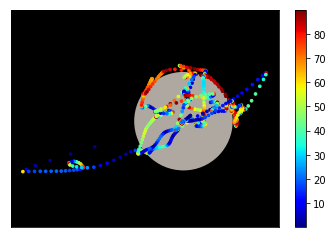

In [34]:
name = handpicked[0:1][0]
circ_r = circ_parameters.loc[circ_parameters.name == name, 'circ_radii'].values

path = [data for data in datalist if name in data]
p = [x for x in path if 'first' in x][0]
file = pd.read_csv(p)

x_gauss = file.loc[:, 'x_gauss'].values
y_gauss = file.loc[:, 'y_gauss'].values
angle = file.loc[:,'angle'].values

f1, _ = angleCorloredTrajectory(x_gauss, y_gauss, circ_r, angle)
f1.savefig(fig_path + 'AngleColoredTrajectory_c1Example.svg')